In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None) 



Requisitos que deben cumplir las gráficas:

 -Todas deben llevar título.

 -Los nombres de los ejes deben estar en castellano.

 -En los scatterplot los puntos deben tener un tamaño de 2.

 -En los scatterplot los puntos deben tener un color diferente al azul.

 -En los barplot las barras siempre tienen que estar ordenadas de mayor a menor.

 -En los barplot y countplot las barras tienen que tener un color diferente a los que vienen por defecto.

 -En los pieplot los quesitos deben tener unos colores diferentes a los que vienen por defecto.

 -En los pieplot siempre tenemos que añadir la etiqueta de a que % corresponde cada quesito.
 
 -En los pieplot el tamaño de los % tiene que ser de 6.

In [4]:
df_pair = pd.read_csv('ficheros/pair_sin_nulos.csv', index_col=0)

In [5]:
df_pair.head(5)

,country,density,abbreviation,agriculturalland,landarea,birthrate,callingcode,capital/majorcity,co2-emissions,currency-code,fertilityrate,forestedarea,gdp,grossprimaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,urban_population,lattitude,longitude,continente,armedforcessize,cpi,cpichange,gasolineprice,grosstertiaryeducationenrollment,maternalmortalityratio,minimumwage,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate
0,Afghanistan,60.0,AF,58.1,652230.0,32.49,93.0,Kabul,8672.0,AFN,4.47,2.1,1.910135e+10,104.0,47.9,Kabul,64.5,Pashto,78.4,0.28,38041754.0,9797273.0,33.939110,67.709953,Asia,323000.0,149.900,2.30,0.70,9.70,638.0,0.43,48.90,9.30,71.40,11.120
1,Albania,105.0,AL,43.1,28748.0,11.78,355.0,Tirana,4536.0,ALL,1.62,28.1,1.527808e+10,107.0,7.8,Tirana,78.5,Albanian,56.9,1.20,2854191.0,1747593.0,41.153332,20.168331,Europa,9000.0,119.050,1.40,1.36,55.00,15.0,1.12,55.70,18.60,36.60,12.330
2,Algeria,18.0,DZ,17.4,2381741.0,24.28,213.0,Algiers,150006.0,DZD,3.02,0.8,1.699882e+11,109.9,20.1,Algiers,76.7,Arabic,28.1,1.72,43053054.0,31510100.0,28.033886,1.659626,África,317000.0,151.360,2.00,0.28,51.40,112.0,0.95,41.20,37.20,66.10,11.700
3,Andorra,164.0,AD,40.0,468.0,7.20,376.0,Andorra la Vella,469.0,EUR,1.27,34.0,3.154058e+09,106.4,2.7,Andorra la Vella,73.2,Catalan,36.4,3.33,77142.0,67873.0,42.506285,1.521801,Europa,22200.0,108.672,0.92,1.51,59.58,169.0,6.63,60.32,18.24,39.48,6.782
4,Angola,26.0,AO,47.5,1246700.0,40.73,244.0,Luanda,34693.0,AOA,5.52,46.3,9.463542e+10,113.5,51.6,Luanda,60.8,Portuguese,33.4,0.21,31825295.0,21061025.0,-11.202692,17.873887,África,117000.0,261.730,17.10,0.97,9.30,241.0,0.71,77.50,9.20,49.10,6.890


1. ¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?
 - Birth Rate: Número de nacimientos por cada 1,000 habitantes por año.


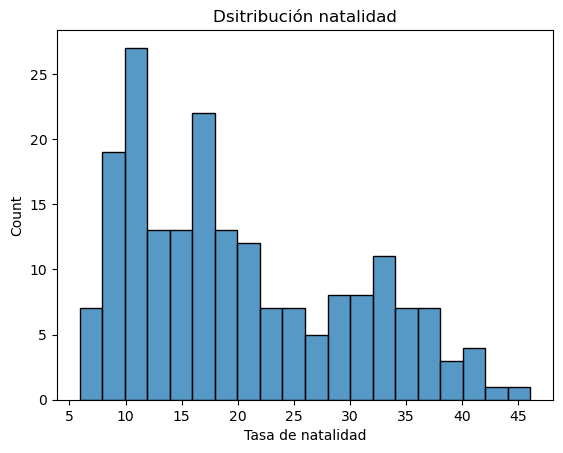

In [8]:
sns.histplot(x = 'birthrate', data=df_pair, bins= 20)

plt.xlabel('Tasa de natalidad')
plt.title('Dsitribución natalidad');

2.
¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? Proporciona una breve descripción de los patrones que observes.


- Infant mortality: Número de muertes por cada 1,000 nacidos vivos antes de cumplir un año de edad. 

- Life expectancy: Número promedio de años que se espera que viva un recién nacido.

- En el gráfico podemos ver que cuanta mas mortalidad infantil,  hay menos esperanza de vida y cuanta menos mortalidad infantil hay, mas esperanza de vida 

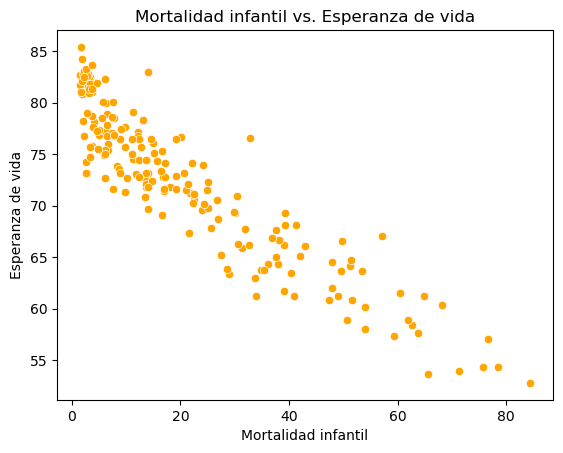

In [9]:
#infantmortality #lifeexpectancy

sns.scatterplot(x = 'infantmortality',y = 'lifeexpectancy', data=df_pair, color='orange')

plt.xlabel('Mortalidad infantil')
plt.ylabel('Esperanza de vida')
plt.title('Mortalidad infantil vs. Esperanza de vida');

3.
¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.

In [10]:
#Hacemos un df nuevo donde agrupamos los paises por continente
df_paises_por_continente= df_pair.groupby('continente')['country'].count().reset_index()

In [11]:
df_paises_por_continente

,continente,country
0,América del Norte,21
1,América del Sur,12
2,Asia,43
3,Desconocido,15
4,Europa,42
5,Oceanía,13
6,África,49


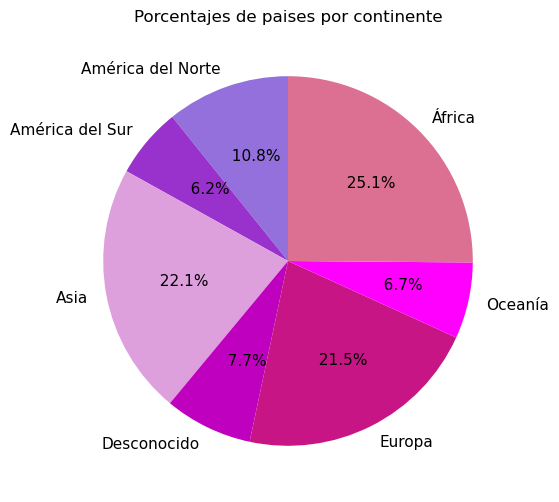

In [12]:
colores = ['mediumpurple', 'darkorchid', 'plum', 'm', 'mediumvioletred','magenta', 'palevioletred', ]

plt.pie( 'country', labels='continente',
        data= df_paises_por_continente,
        autopct=  '%6.1f%%', 
        colors = colores, 
        textprops={'fontsize': 11}, 
        startangle=90)

plt.title('Porcentajes de paises por continente')
plt.gcf().set_size_inches(8,6);

4.
¿Cuál es la mediana de la esperanza de vida en Europa? Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos. s


- Por lo que podemos ver en el gráfico no hay valores atípicos

In [14]:
#Planteamos la condicion para hacer un df nuevo y trabajar con os datos de Europa
condicion_europa = df_pair['continente'] == 'Europa'

In [15]:
df_europa = df_pair[condicion_europa]

In [16]:
df_europa['lifeexpectancy'].median()

80.85

In [17]:
df_europa['lifeexpectancy'].describe()

count    42.000000
mean     78.880952
std       3.857981
min      71.600000
25%      75.550000
50%      80.850000
75%      82.025000
max      85.400000
Name: lifeexpectancy, dtype: float64

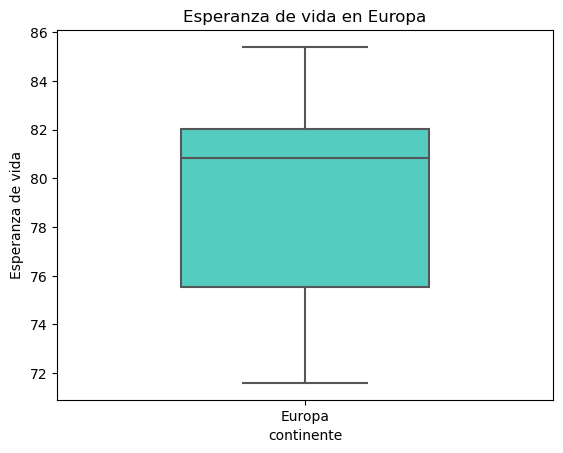

In [18]:
sns.boxplot(x = "continente",
            y = 'lifeexpectancy', 
            data = df_europa, 
            width = 0.5, 
            color = "turquoise")


plt.ylabel('Esperanza de vida')
plt.title('Esperanza de vida en Europa');

5.
¿Existen relaciones visibles entre la tasa de natalidad y las siguientes variables: tasa de mortalidad infantil, esperanza de vida, densidad de población y población urbana? Usa un subplot. Describe cualquier patrón que encuentres.


- Urban_population: Porcentaje de la población que vive en áreas urbanas.

- Life expectancy: Número promedio de años que se espera que viva un recién nacido.

- Infant mortality: Número de muertes por cada 1,000 nacidos vivos antes de cumplir un año de edad.

- Birth Rate: Número de nacimientos por cada 1,000 habitantes por año.

- Density\n(P/Km2): Densidad de población medida en personas por kilómetro cuadrado.

- Relación tasa de natalidad vs Mortalidad infantil: Según gráfico podriamos decir que cuanto mas alta es la tasa de natalidad, la mortalidad infantil tiende a subir. Esto quizas tenga que ver con que si hay mas nacimientos es mas probables que pueda haber mas muertes.

- Relación tasa de natalidad vs Densidad de población: Idem abajo

- Relación tasa de natalidad vs Pobación urbana: Se puede ver que hay algun valor atípico pero no hay una relación clara entre ambas variables 

- Relación tasa de natalidad vs Esperanza de vida:

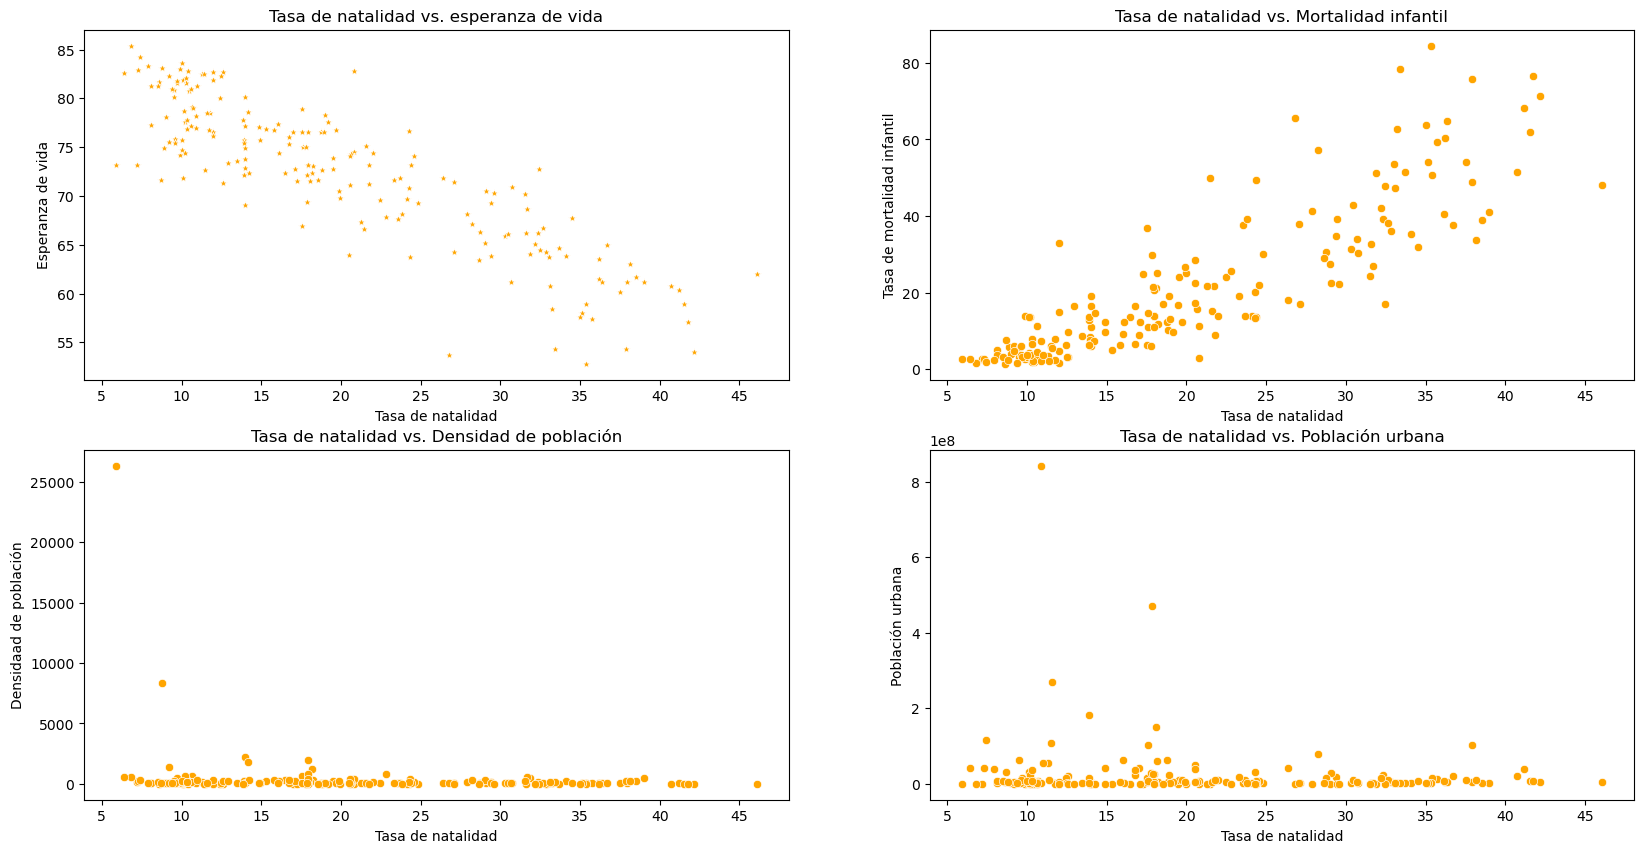

In [33]:
#'birthrate', 'infantmortality', 'lifeexpectancy','density,'urban_population'
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,10))

sns.scatterplot (x = 'birthrate',
                y = 'lifeexpectancy',
                data= df_pair,
                marker = '*',
                color= 'orange',
                ax = axes[0][0])

axes[0][0].set_title('Tasa de natalidad vs. esperanza de vida')
axes[0][0].set_xlabel('Tasa de natalidad')
axes[0][0].set_ylabel('Esperanza de vida')

sns.scatterplot( x= 'birthrate',
                 y = 'infantmortality',
                  data= df_pair,
                  markers= 'v',
                  color = 'orange',
                  ax= axes[0][1])

axes[0][1].set_title('Tasa de natalidad vs. Mortalidad infantil')
axes[0][1].set_xlabel('Tasa de natalidad')
axes[0][1].set_ylabel('Tasa de mortalidad infantil')

sns.scatterplot( x= 'birthrate',
                 y = 'density',
                  data= df_pair,
                  markers= 'v',
                  color = 'orange',
                  ax= axes[1][0])

axes[1][0].set_title('Tasa de natalidad vs. Densidad de población')
axes[1][0].set_xlabel('Tasa de natalidad')
axes[1][0].set_ylabel('Densidaad de población')

sns.scatterplot( x= 'birthrate',
                 y = 'urban_population',
                  data= df_pair,
                  markers= 'v',
                  color = 'orange',
                  ax= axes[1][1])

axes[1][1].set_title('Tasa de natalidad vs. Población urbana')
axes[1][1].set_xlabel('Tasa de natalidad')
axes[1][1].set_ylabel('Población urbana');



6.
¿Cuáles son los 10 países con la mayor área forestal?


Forested Area (%): Porcentaje del área total cubierta por bosques.

In [34]:
df_pair_forestal = df_pair[['country', 'forestedarea']].sort_values(by='forestedarea', ascending=False).head(10)

In [35]:
df_pair_forestal

,country,forestedarea
167,Suriname,98.3
111,Federated States of Micronesia,91.9
61,Gabon,90.0
154,Seychelles,88.4
132,Palau,87.6
71,Guyana,83.9
92,Laos,82.1
159,Solomon Islands,77.9
135,Papua New Guinea,74.1
59,Finland,73.1


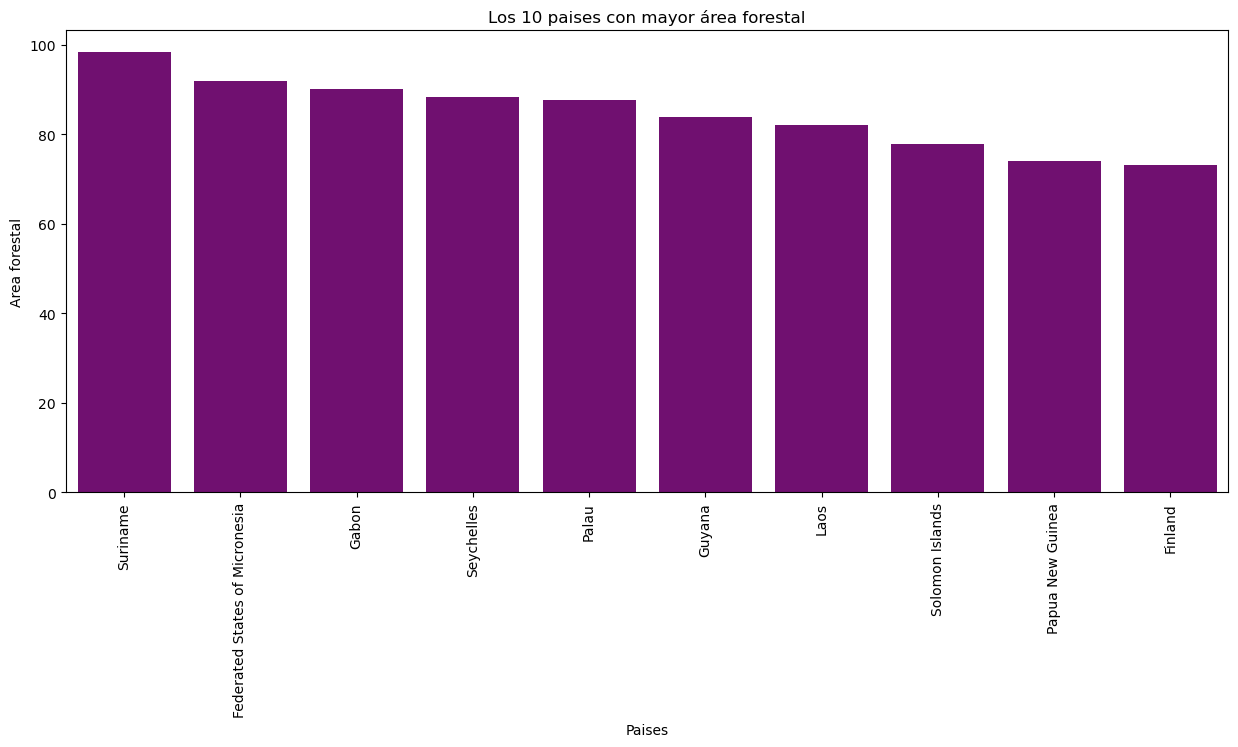

In [38]:
sns.barplot(x='country',
           y= 'forestedarea',
           data= df_pair_forestal,
           color= 'purple')
plt.title('Los 10 paises con mayor área forestal')
plt.xlabel('Paises')
plt.ylabel('Area forestal')

plt.xticks(rotation = 90)
plt.gcf().set_size_inches(15,6);

7.
¿Existen diferencias notables en la distribución de la tasa de natalidad entre continentes?

- Podemos ver en el gráfico que África es el contienente con mayor porcentaje de tasa de natalidad y Europa tiene una tasa bastante menor que África, podriamos decir que entre ambos continentes hay una diferencia notable. Entre el resto de continenes no hay diferencias notables en los porcentajes.

In [39]:

df_continentes_natalidad = df_pair.groupby('continente')['birthrate'].mean().round(2).reset_index()

In [40]:
df_continentes_natalidad

,continente,birthrate
0,América del Norte,16.33
1,América del Sur,17.37
2,Asia,18.78
3,Desconocido,19.84
4,Europa,9.84
5,Oceanía,22.34
6,África,32.00


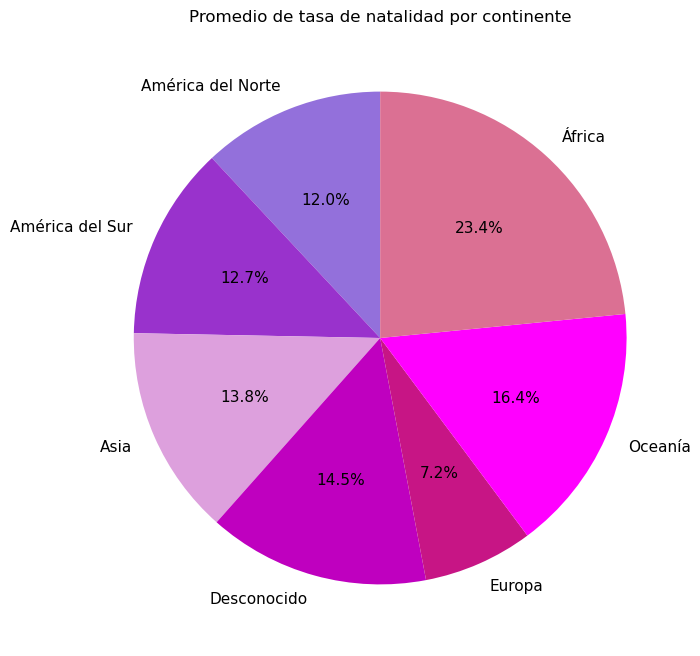

In [41]:
#continenete, birthrate 
colores = ['mediumpurple', 'darkorchid', 'plum', 'm', 'mediumvioletred','magenta', 'palevioletred', ]


# creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior
plt.pie("birthrate", labels= "continente",
        data = df_continentes_natalidad, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 11}, 
        startangle=90)
#Parametro para establecer fondos a los gráficos
sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})
plt.title('Promedio de tasa de natalidad por continente')
plt.gcf().set_size_inches(15,8);

8.
¿Cómo se relacionan el CPI y el precio de la gasolina? Crea un scatter plot que muestre esta relación y agrega una línea para visualizar la tendencia. Ajusta los valores del CPI entre 100 y 300.


- CPI: Índice de Precios al Consumidor (IPC), una medida de la inflación y el poder adquisitivo.

- Gasoline Price: Precio de la gasolina por litro en moneda local.

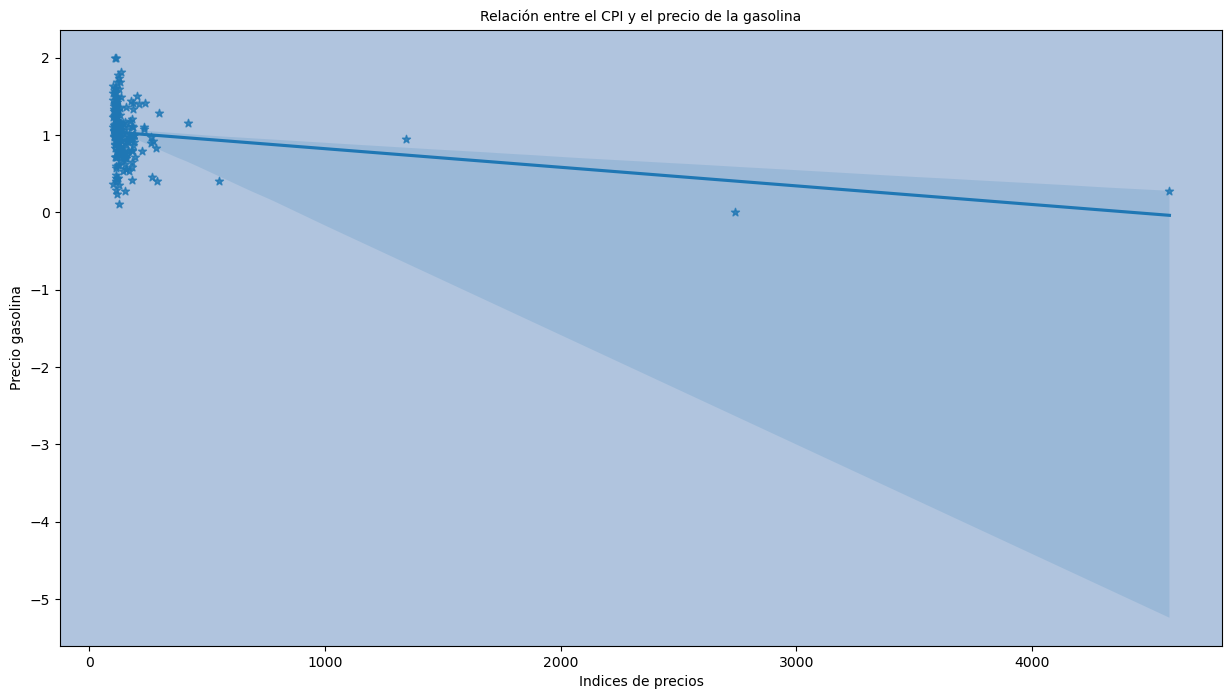

In [42]:
sns.regplot(x = "cpi", 
            y = "gasolineprice", 
            data = df_pair, 
            marker = "*", 
          
);



plt.xlabel("Indices de precios", fontsize =10)
plt.ylabel("Precio gasolina", fontsize = 10)
plt.xlim = ([100,300])
# ponemos título a la gráfica
plt.title("Relación entre el CPI y el precio de la gasolina", fontsize = 10)
plt.gcf().set_size_inches(15,8);

9.
¿Cómo varía la esperanza de vida entre los diferentes países de Oceanía? Utiliza un diagrama de violín para representar la distribución de la esperanza de vida en función del idioma oficial de cada país.


Se puede ver que la mayoría de los países en oceanía hablan ingles, por lo tanto los datos se concentran en este tipo de paises. Se puede ver que la esperanza de vida en los paises que hablan ingles es bastante mas alta que en el resto de los paises.

In [43]:
#filtramos por continente para hacer un df nuevo y quedrnos solamente con oceania. Sobre ese dataframe vamos a trabajar
condicion= df_pair['continente'] == 'Oceanía'

In [44]:
df_oceania= df_pair[condicion]

In [49]:
df_oceania.groupby('officiallanguage')['population'].sum().reset_index()

,officiallanguage,population
0,English,31423351.0
1,Fiji Hindi,889953.0
2,French,299882.0
3,Marshallese,58791.0
4,Samoan,202506.0
5,Tok Pisin,8776109.0
6,Tongan Language,100209.0
7,Tuvaluan Language,11646.0


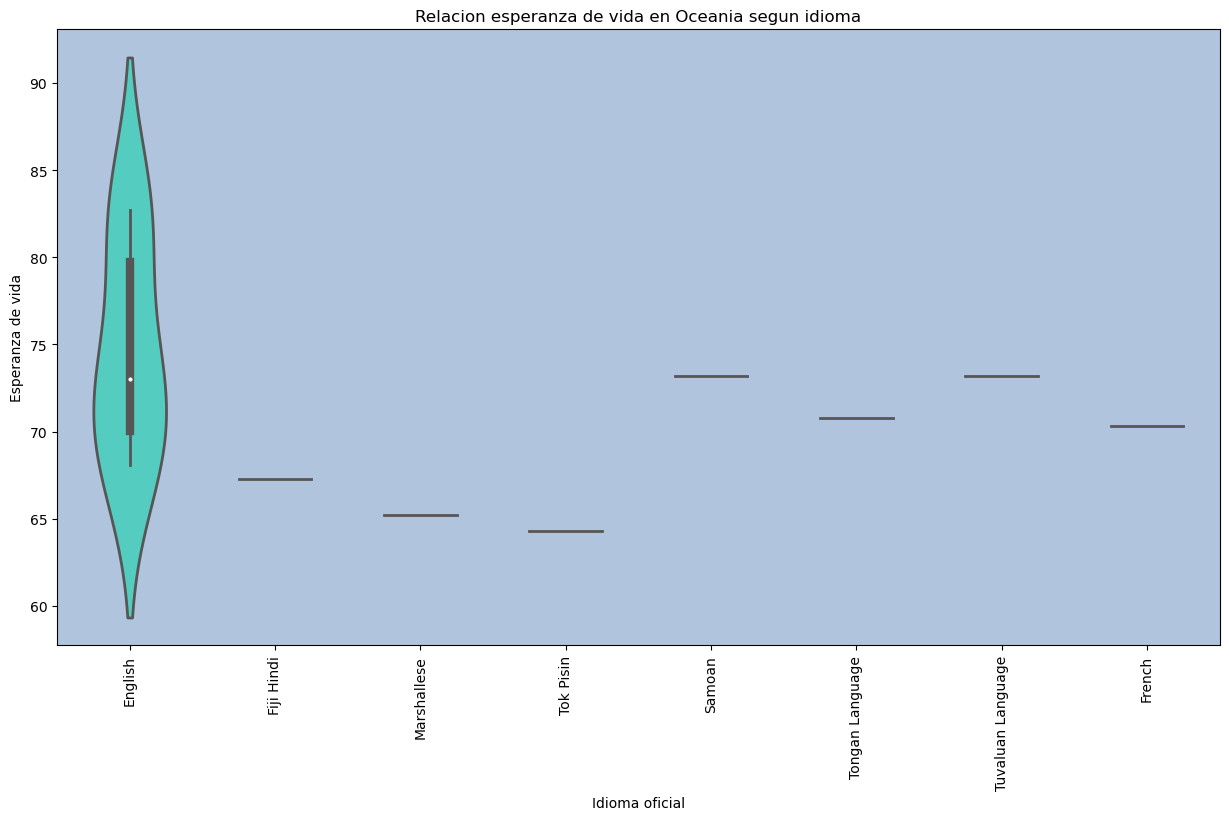

In [45]:
sns.violinplot(x = "officiallanguage",
               y= "lifeexpectancy", 
               data = df_oceania, 
               width = 0.5, 
               color = "turquoise", 
               linewidth = 2)
               
plt.xticks(rotation = 90)
plt.xlabel('Idioma oficial')
plt.ylabel('Esperanza de vida')
plt.title('Relacion esperanza de vida en Oceania segun idioma');
plt.gcf().set_size_inches(15,8);      

10.
Queremos analizar la relación entre la tasa de impuestos total, el PIB per cápita y la tasa de alfabetización. Crea un conjunto de subplots con tres gráficas:
Un scatter plot que muestre la relación entre el PIB per cápita y el CPI.
Un histograma de la tasa de impuestos total.
Un gráfico de barras que resuma la tasa de impuestos total por continente.

- CPI: Índice de Precios al Consumidor (IPC), una medida de la inflación y el poder adquisitivo.

- Gross primary education enrollment (%): Tasa bruta de matriculación en educación primaria.

- GDP: Producto Interno Bruto, el valor total de bienes y servicios producidos en el país. 

In [50]:
#Para el tercer subplot trabajamos en un dataframe creado para poder sacar la tasa de impuesto total por continente
df_impuestos_continente = df_pair.groupby('continente')['gdp'].sum().round(2).reset_index()

In [51]:
df_impuestos_continente 

,continente,gdp
0,América del Norte,3.517297e+12
1,América del Sur,3.855538e+12
2,Asia,3.554597e+13
3,Desconocido,2.420229e+13
4,Europa,2.100724e+13
5,Oceanía,1.634638e+12
6,África,2.423912e+12


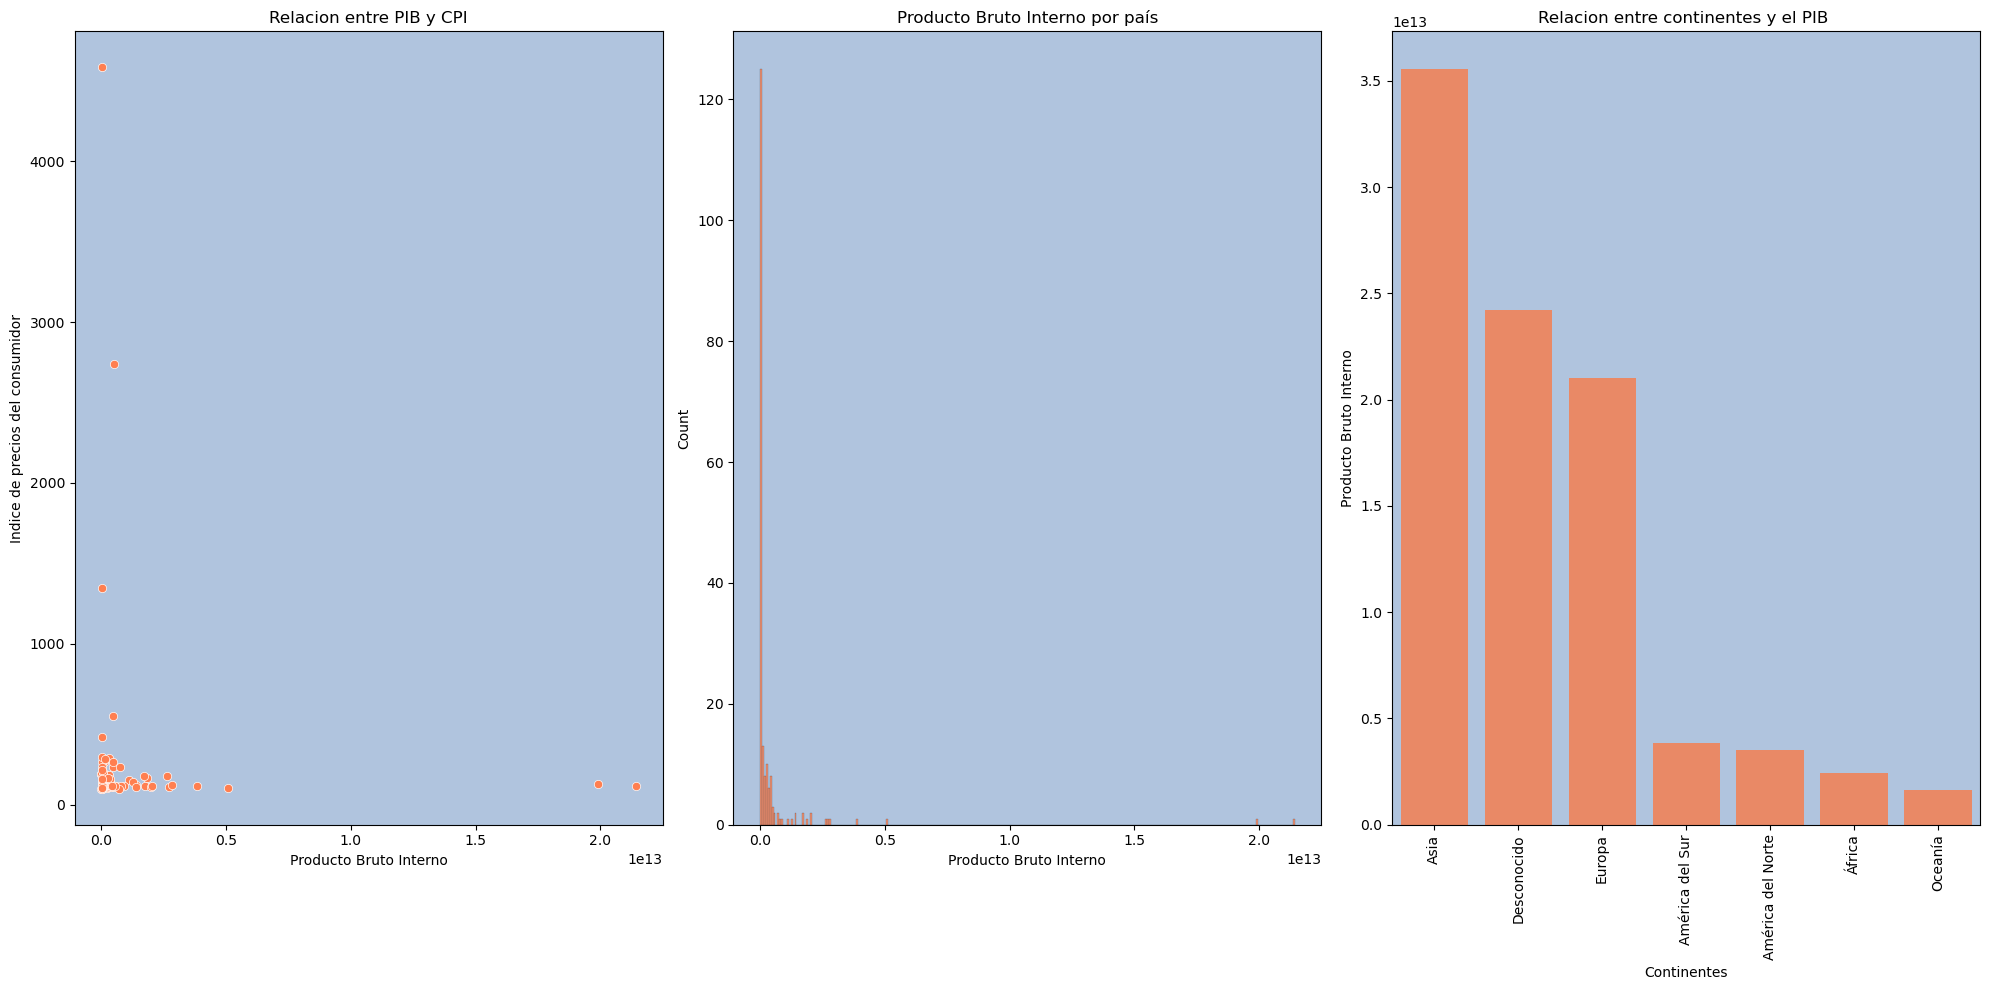

In [57]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20,10))

sns.scatterplot(x = "gdp", 
            y = "cpi", 
            data = df_pair, 
            ax = axes[0], 
            color= "coral")
axes[0].set_xlabel("Producto Bruto Interno")
axes[0].set_ylabel("Indice de precios del consumidor")

axes[0].set_title('Relacion entre PIB y CPI')

sns.histplot(x = "gdp",  
               data = df_pair, 
               ax = axes[1], 
               color= "coral"
               )
axes[1].set_xlabel("Producto Bruto Interno")
axes[1].set_title("Producto Bruto Interno por país")


sns.barplot(x = "continente", 
            y = "gdp", 
            data = df_impuestos_continente,
            ax = axes[2], 
            color= "coral",
            order= ['Asia', 'Desconocido', 'Europa', 'América del Sur', 'América del Norte', 'África', 'Oceanía'])
            
df_pair.sort_values(by='gdp', ascending=False)
plt.xticks(rotation = 90)
axes[2].set_xlabel("Continentes")
axes[2].set_ylabel("Producto Bruto Interno")

plt.title('Relacion entre continentes y el PIB ')


plt.tight_layout();